In [279]:
using LinearAlgebra, Statistics
using Distributions, Plots
using NBInclude
using FFTW
using ToeplitzMatrices

include("readclassjson.jl")
include("qr.jl")

fullqr (generic function with 1 method)

# 8.1080

In [19]:
A=[19/2 17/2 15/2 13/2 11/2 9/2 7/2 5/2 3/2 1/2
      1    1    1    1    1   1   1   1   1   1 
    9/2  7/2  5/2  3/2  1/2   0   0   0   0   0]
p=[1
0
0]
x=A'inv(A*A')p

10-element Vector{Float64}:
 -0.045454545454545414
 -0.007575757575757569
  0.030303030303030443
  0.06818181818181832
  0.10606060606060622
  0.09393939393939404
  0.03181818181818183
 -0.030303030303030415
 -0.09242424242424264
 -0.15454545454545487

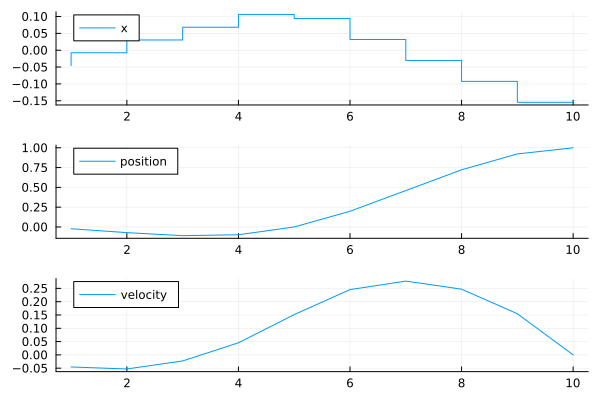

In [49]:
S=TriangularToeplitz([1/2, 3/2, 5/2, 7/2, 9/2, 11/2, 13/2, 15/2, 17/2, 19/2],:L)*x
V=TriangularToeplitz([1,1,1,1,1,1,1,1,1,1],:L)*x
p1=plot(x, linetype=:steppre, labels="x",legend=:topleft)
p2=plot(S, labels = "position", legend=:topleft)
p3=plot(V, labels = "velocity", legend=:topleft)
l = @layout [a 
    b 
    c]
plot(p1, p2, p3, layout = l)

# B

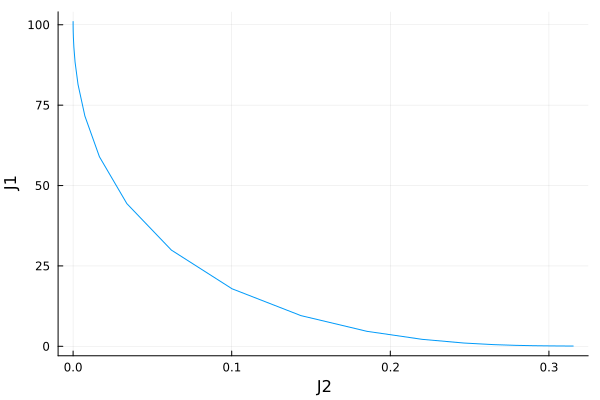

In [62]:
A = [19/2 17/2 15/2 13/2 11/2 9/2 7/2 5/2 3/2 1/2
        1.   1.   1.   1.   1.  1.  1.  1.  1.  1]
y=[-10
  -1]
mu=collect(1:0.5:200)
mu=exp.(mu)
J1=[]
J2=[]
for i in mu
    x=inv(A'A+i*I(10))*A'y
    append!(J1, norm(A*x-y)^2)
    append!(J2, norm(x)^2)
end
plot(J2, J1, xlabel = "J2", ylabel = "J1", labels="")    

# 13.17030

In [254]:
data = readclassjson("impact_times.json")
B = data["B"]
A = data["A"]
m = data["m"]
T1 = data["T1"]
N = data["N"]
K = data["K"]
Tfin = data["Tfin"]
n = data["n"]

10

In [302]:
value = 0
maxs = 0
singvals = []

for i in 1:15    
    Tstep = i
    A1 =A^(Tfin-N*Tstep+T1)
    Ahat = A^((N-1)*Tstep+T1)*B
    for i in 2:N
        Ahat = [Ahat A^((N-i)*Tstep+T1)*B]
    end
    D = A1*Ahat
    U, S, V = svd(D)
    new_value = S[1]
    append!(singvals, S[1])
    println(new_value)
    if new_value>value
        maxs=i
        value = new_value
    end
end

8.523022333004096
8.790734105834126
8.84060872936634
8.73439085119735
8.611358130898209
8.669919375003277
8.98436563396385
9.401656327888814
11.016016846999342
10.093102285115506
9.89485809832607
9.665715494880303
9.541526313900087
9.75078683221873
10.187760897406118


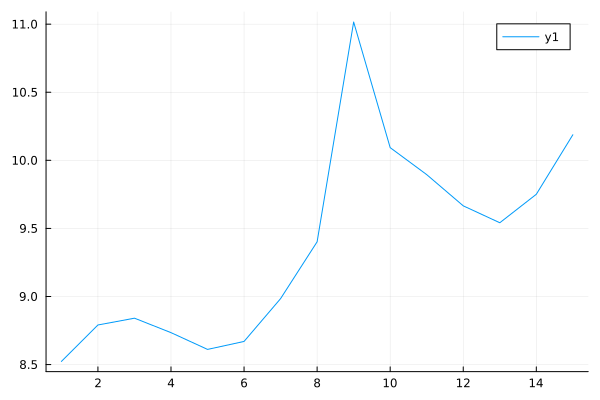

In [303]:
plot(singvals)

In [298]:
#Now I can solve for u becuase I found the optimal "D"
Tstep = maxs
A1 =A^(Tfin-N*Tstep+T1)
Ahat = A^((N-1)*Tstep+T1)*B
for i in 2:N
    Ahat = [Ahat A^((N-i)*Tstep+T1)*B]
end
D = A1*Ahat
U, S, V = svd(D)
u = V'[:,1]


10-element Vector{Float64}:
 -0.15448593153315024
 -0.2518309395418586
  0.037253849203902276
  0.04950765935151614
  0.03925800869478075
  0.0668620647296089
 -0.13803964380855277
 -0.31901444655315775
 -0.30883186517440303
 -0.22007356648961385

In [311]:
D2 = [D[:,1] zeros(10, 9)]
u2 = [u[1] zeros(1, 9)]
for i in 2:10
    D2 = [D2 D[:,i] zeros(10, 9)]
    u2 = [u2 u[i] zeros(1, 9)]
end



# Ts part

3.2282939005650344
3.491696555420433
3.441895058095561
3.0701917214053793
2.475277019651855
1.7918110278343662
1.5404085386122397
2.1987916507281486
2.8756645890258152
3.368446596797619
3.582657090915024
3.4532427301706194
3.0273861670484115
2.3790869180729066
1.6985502368528829
1.6921151737291396
2.392574468836418
3.052201464323811
3.509501997040909
3.651694285865847
3.460831657518
2.9620123796593067
2.28537769183934
1.6015062253894135
1.8651530809937171
2.587389624409913
3.2290795564878003
3.6373105075439027
3.712976650976161
3.447558436416755
2.892102390387697
2.180543718767539
1.5209043117441292
2.0526671563995134
2.7798172247177213
3.4081074755849277
3.7487764178196508
3.7647278428565594
3.41747541626924
2.8125755011715436
2.0709289409641825
1.5641448827856135
2.235012020473826
2.9921321549842244
3.5620619405573506
3.8674510546102323
3.784446215177066
3.3888094100146637


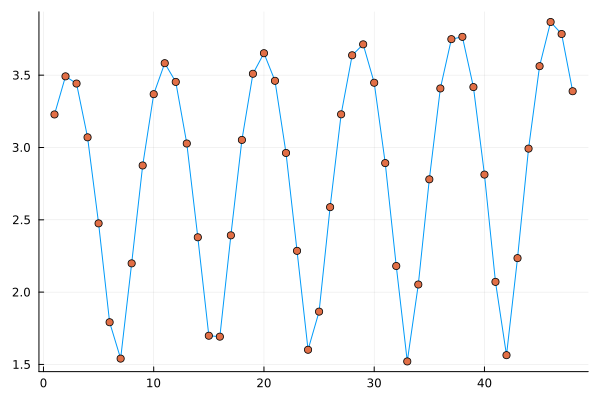

In [332]:
value = 0
maxs = 0
singvals = []
for i in T1:K
    Ts=i
    E = A^(Tfin-Ts-1)*B
    U, S, V = svd(E)
    append!(singvals, S[1])
        
    new_value = S[1]
    println(new_value)
    if new_value>value
        maxs=i
        value = new_value
    end
end

plot(singvals, labels = "")
scatter!(singvals, labels = "")


In [330]:
maxs

48

In [321]:
Ahat = A^(Tfin-Ts-1+T1)*B

LoadError: UndefVarError: Ts not defined

In [261]:
Tstep = 1
A^(Tfin-N*Tstep+T1)

10×10 Matrix{Float64}:
  0.0108605   -0.00073374  -0.00210936  …  -0.0053972    0.00562614
 -0.123562     0.398983     0.0606755       0.123174    -0.154948
  0.165575     0.161898    -0.0884201       0.0197711    0.149564
 -0.00755651  -0.029129     0.0118862      -0.00900558  -0.015934
 -0.00149625  -0.266384     0.00482101     -0.0711892    0.0188483
 -0.101324    -0.144643     0.0596035   …  -0.0286979   -0.0949425
 -0.0653543    0.0767828    0.0329317       0.0244381   -0.0700302
 -0.0797171   -0.338927     0.0540314      -0.0848739   -0.0628604
 -0.104047     0.490883     0.046695        0.153151    -0.13932
  0.078681     0.0478872   -0.0501345       0.0100521    0.08557

# 13.18030

1.72
[-196.2800000000048, 168.32780000000406]
optimal i
2


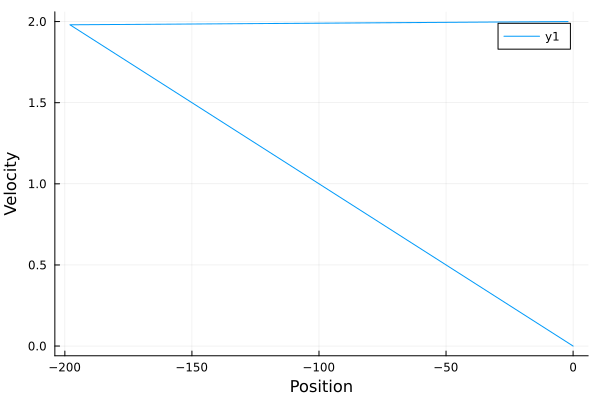

In [213]:
A=[0   1
   39 -15]
b = [0
    -80]
h=0.01
Adisc = (h*A+I(2))
bdisc = h*b
z0=[ 2
    -2]
zn = [0
      0]
xholder = []
xdotholder=[]
for i in 1:100
    n=i
    yhat = zn-Adisc^n*z0
    Ahat = Adisc^(n-1)*B
    for i in (n-1):-1:0
        yhat = yhat-Adisc^(i)*bdisc
    end
    if n>1
        for i in (n-1):-1:1
            Ahat = [Ahat Adisc^(i-1)*B]
        end
    end
    global u=pinv(Ahat)*yhat
    egad=Ahat*u
    println(u)
    append!(xholder, egad[1])
    append!(xdotholder, egad[2])
    if (norm(Ahat*u - yhat)<1e-6)
        println("optimal i")
        println(i)
        break
    end
end

z1= Adisc*z0+bdisc+[0;1]*u[1]
z2= Adisc*z1+bdisc+[0;1]*u[2]
position=[2;z1[1]; z2[1]]
velocity = [-2;z1[2]; z2[2]]
plot(velocity, position, ylabel = "Velocity", xlabel = "Position")

# E

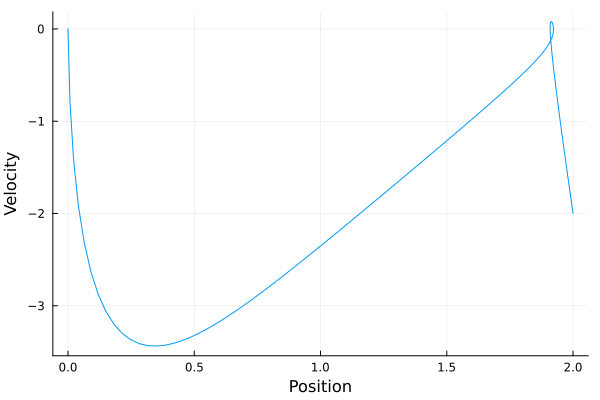

In [251]:
A=[0   1
   39 -15]
b = [0
    -80]
h=0.01
Adisc = (h*A+I(2))
bdisc = h*b
z0=[ 2
    -2]
zn = [0
      0]
B=[0;1]

n=200
yhat = zn-Adisc^n*z0
for i in (n-1):-1:0
    yhat = yhat-Adisc^(i)*bdisc
end

Ahat = reduce(hcat, [Adisc^i*B for i =n-1:-1:0])

u=pinv(Ahat)*yhat
states = zeros(2, 201)
states[:, 1]=z0

for i in 1:200
    states[:, i+1]=Adisc*states[:, i]+bdisc+B*u[i]
end
plot(states[1,:], states[2,:], xlabel = "Position", ylabel = "Velocity", labels="")

# F

In [241]:
uholder = []
states=zn
for i in 200:-1:0
    yhat = zn-Adisc^n*z0
    for i in (n-1):-1:0
        yhat = yhat-Adisc^(i)*bdisc
    end

    Ahat = reduce(hcat, [Adisc^i*B for i =n-1:-1:0])

    u=pinv(Ahat)*yhat
    append![uholder, u[1]]
    
end    



In [ ]:
    states = zeros(2, 201)
    states[:, 1]=z0

    for i in 1:200
        states[:, i+1]=Adisc*states[:, i]+bdisc+B*u[i]
    end
    
    
plot(states[1,:], states[2,:], xlabel = "Position", ylabel = "Velocity", labels="")